In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [58]:
df = pd.read_csv("Churn_Modelling.csv")

In [59]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [60]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [61]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df.shape

(10000, 11)

In [63]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [64]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [65]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [66]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [67]:
df.skew(numeric_only=True)

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

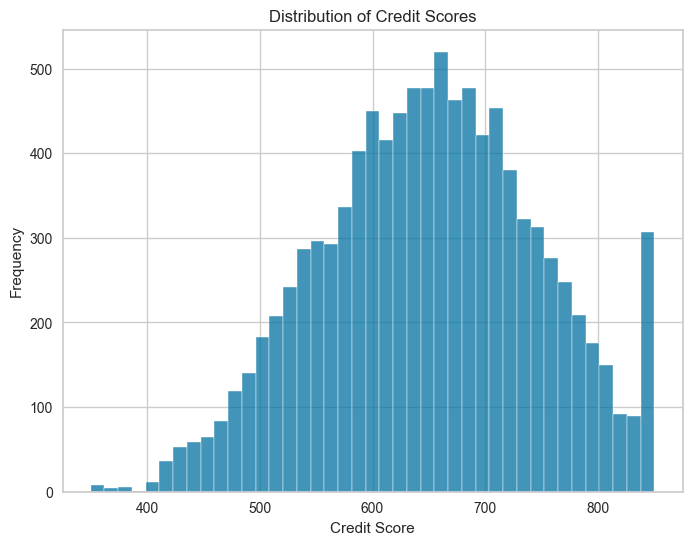

In [68]:
data = df

plt.figure(figsize=(8, 6))
sns.histplot(data['CreditScore'])
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')
plt.show()

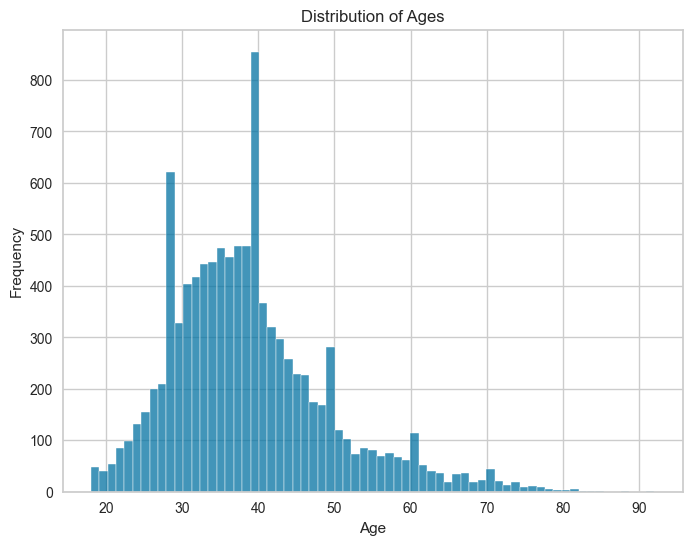

In [69]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

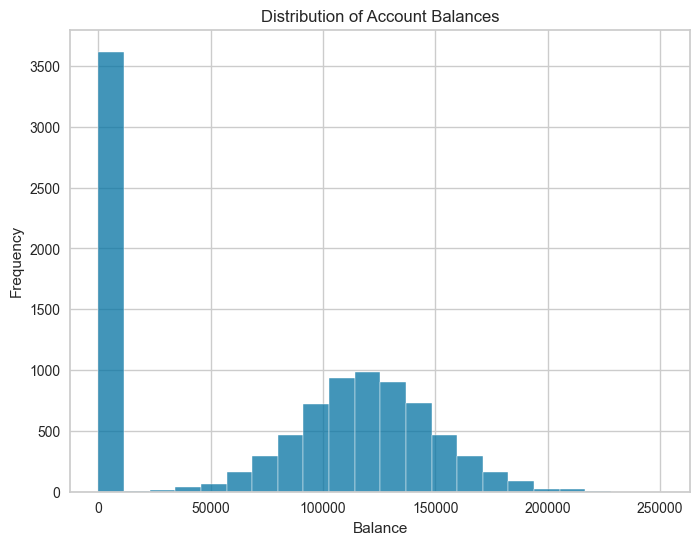

In [70]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Balance'])
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Account Balances')
plt.show()

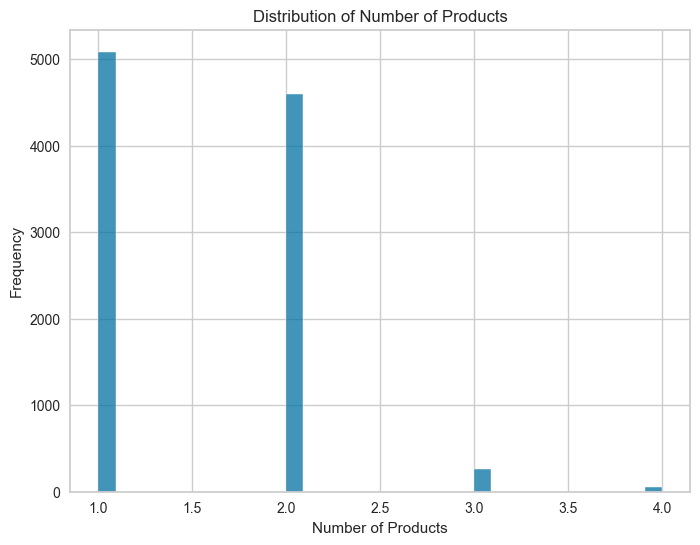

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(data['NumOfProducts'])
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Products')
plt.show()

Optimal lambda value: -0.25786921239057836


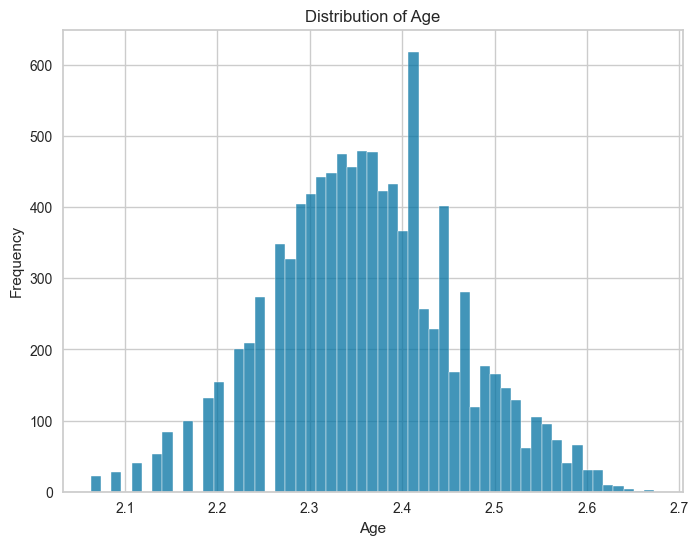

In [72]:
data['Age'], lambda_val = stats.boxcox(data['Age'] + 1)
print("Optimal lambda value:", lambda_val)
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Optimal lambda value: 1.1291601372312923


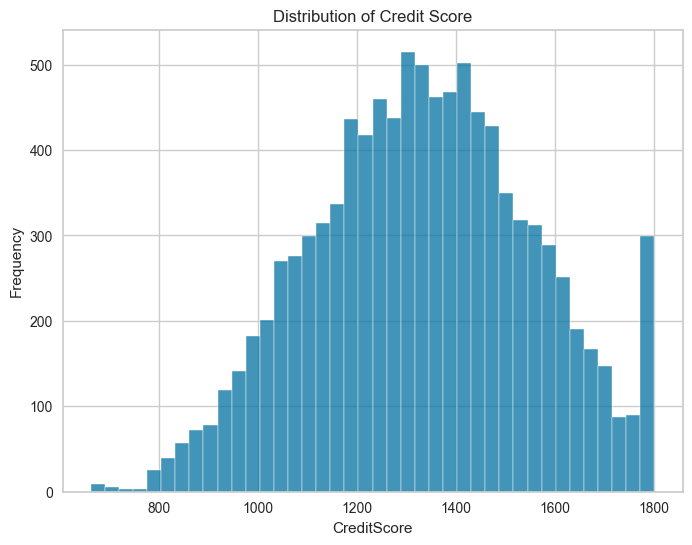

In [73]:
data['CreditScore'], lambda_val = stats.boxcox(data['CreditScore'] + 1)
print("Optimal lambda value:", lambda_val)

plt.figure(figsize=(8, 6))
sns.histplot(data['CreditScore'])
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')
plt.show()

In [74]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1258.915086,France,Female,2.407725,2,0.00,1,1,1,101348.88,1
1,1233.705954,Spain,Female,2.398777,1,83807.86,1,0,1,112542.58,0
2,993.940871,France,Female,2.407725,8,159660.80,3,1,0,113931.57,1
3,1443.941075,France,Female,2.380050,1,0.00,2,0,0,93826.63,0
4,1800.489366,Spain,Female,2.416415,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1612.829287,France,Male,2.380050,5,0.00,2,1,0,96270.64,0
9996,1025.261945,France,Male,2.338795,10,57369.61,1,1,1,101699.77,0
9997,1467.268784,France,Female,2.349631,7,0.00,1,0,1,42085.58,1
9998,1615.189773,Germany,Male,2.407725,3,75075.31,2,1,0,92888.52,1


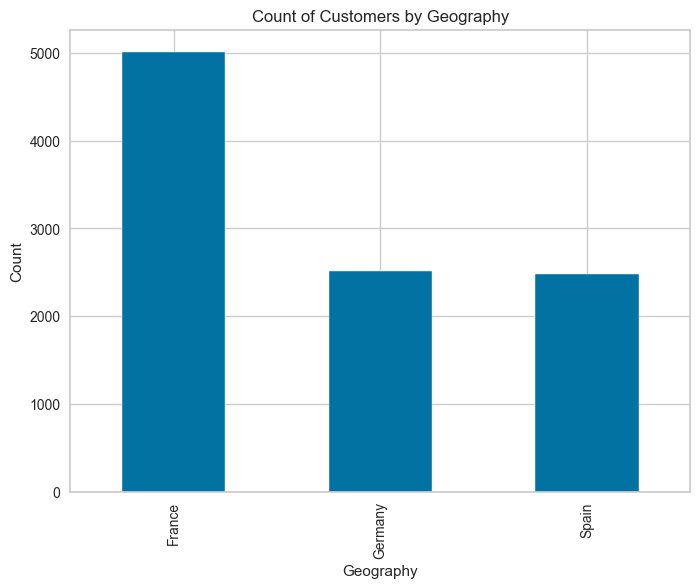

In [75]:
plt.figure(figsize=(8, 6))
data['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Count of Customers by Geography')
plt.show()

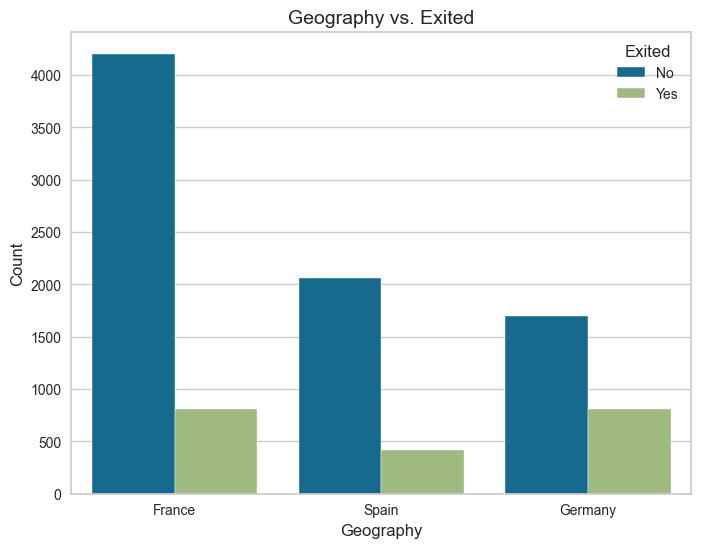

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Geography vs. Exited', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

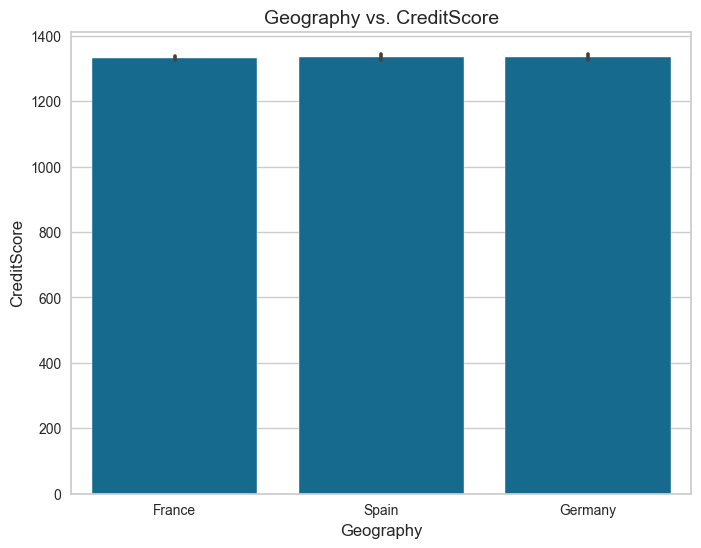

In [77]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Geography', y='CreditScore', data=data)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('CreditScore', fontsize=12)
plt.title('Geography vs. CreditScore', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

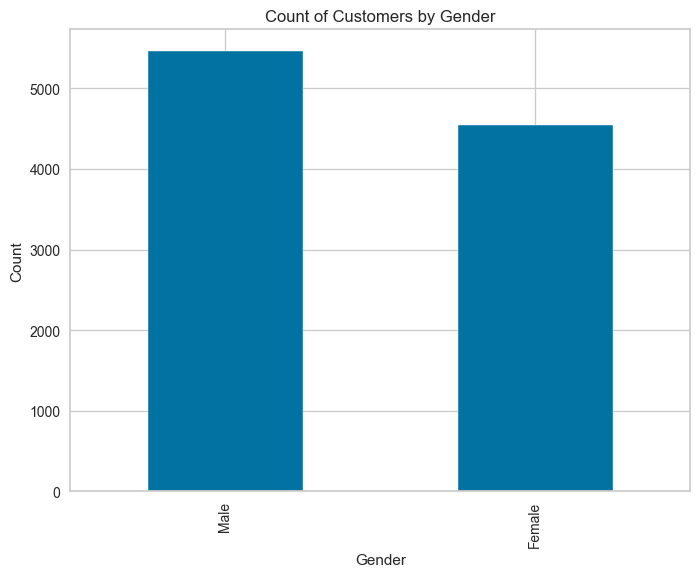

In [78]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender')
plt.show()

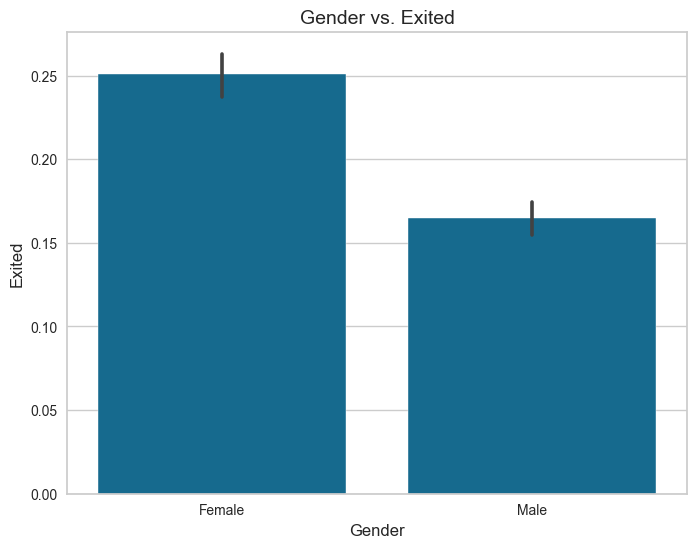

In [79]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Exited', data=data)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exited', fontsize=12)
plt.title('Gender vs. Exited', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

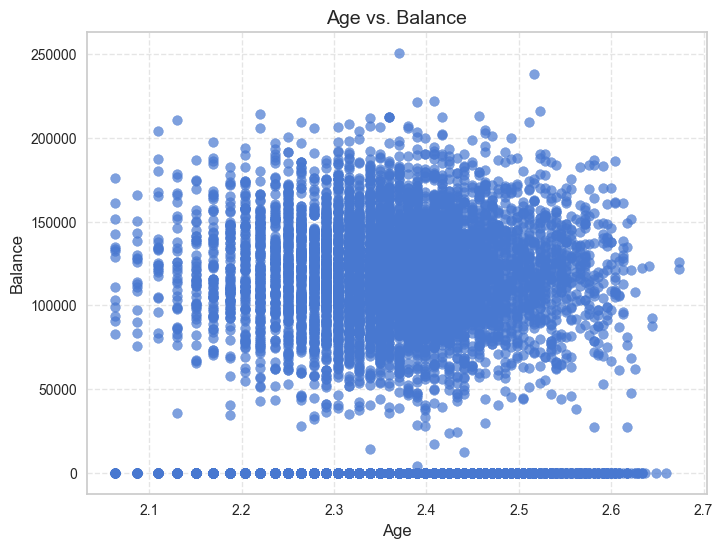

In [80]:
# Set plot style
sns.set_style("whitegrid")

# Set color palette
color_palette = sns.color_palette("muted")

# Scatter Plot - Age vs. Balance
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Balance'], color=color_palette[0], alpha=0.7)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.title('Age vs. Balance', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\kshit\AppData\Local\Temp\ipykernel_20536\316181769.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


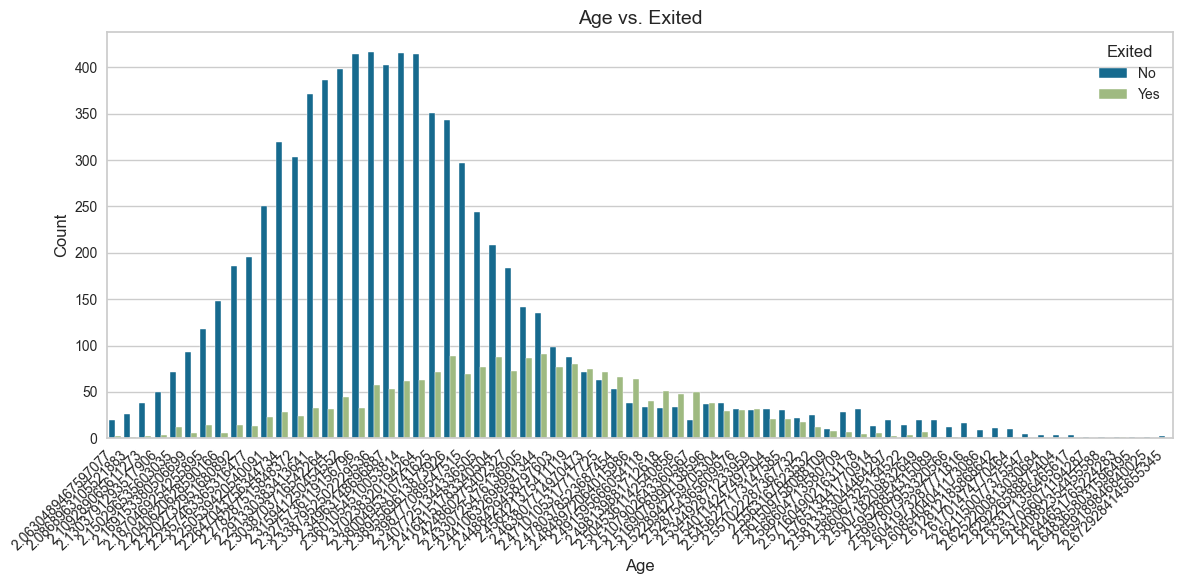

In [81]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age', hue='Exited', data=df)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age vs. Exited', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(title='Exited', labels=['No', 'Yes'])

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

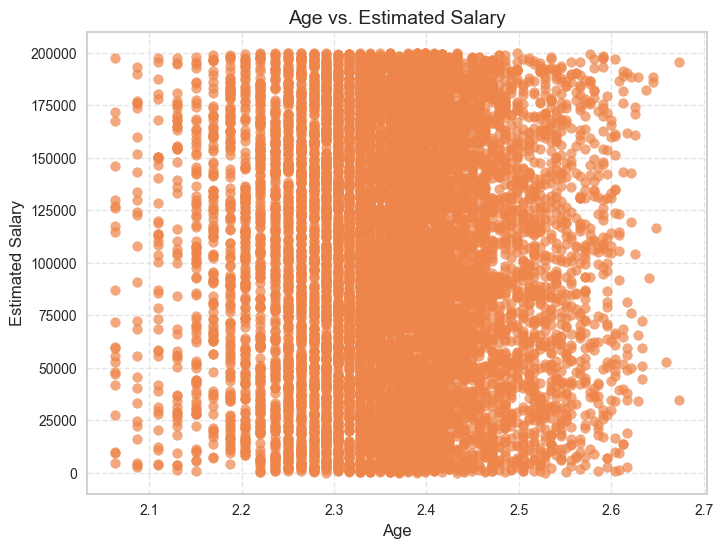

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['EstimatedSalary'], color=color_palette[1], alpha=0.7)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.title('Age vs. Estimated Salary', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<Figure size 800x600 with 0 Axes>

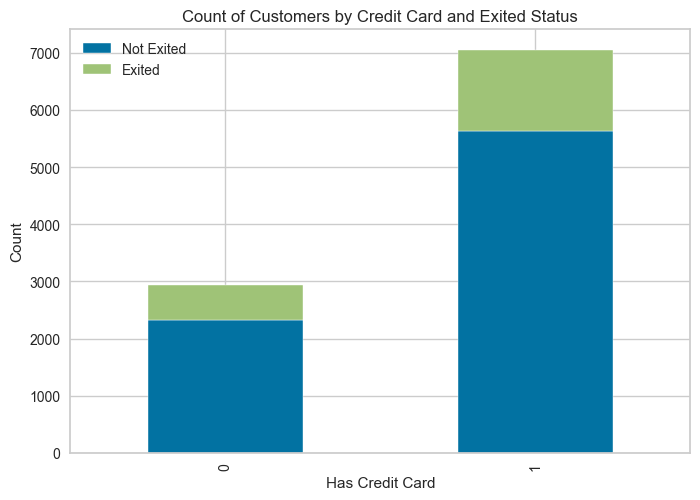

In [83]:
plt.figure(figsize=(8, 6))
data.groupby(['HasCrCard', 'Exited'])['Exited'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Count of Customers by Credit Card and Exited Status')
plt.legend(['Not Exited', 'Exited'])
plt.show()

<Figure size 800x600 with 0 Axes>

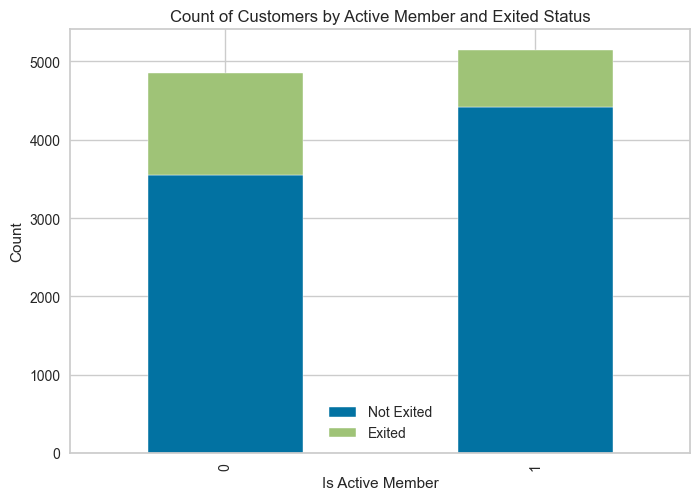

In [84]:
plt.figure(figsize=(8, 6))
data.groupby(['IsActiveMember', 'Exited'])['Exited'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.title('Count of Customers by Active Member and Exited Status')
plt.legend(['Not Exited', 'Exited'])
plt.show()

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

col_list = data.select_dtypes(include = "object").columns
for colsn in col_list:
    data[colsn] = le.fit_transform(data[colsn].astype(str))

In [86]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1258.915086,0,0,2.407725,2,0.00,1,1,1,101348.88,1
1,1233.705954,2,0,2.398777,1,83807.86,1,0,1,112542.58,0
2,993.940871,0,0,2.407725,8,159660.80,3,1,0,113931.57,1
3,1443.941075,0,0,2.380050,1,0.00,2,0,0,93826.63,0
4,1800.489366,2,0,2.416415,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1612.829287,0,1,2.380050,5,0.00,2,1,0,96270.64,0
9996,1025.261945,0,1,2.338795,10,57369.61,1,1,1,101699.77,0
9997,1467.268784,0,0,2.349631,7,0.00,1,0,1,42085.58,1
9998,1615.189773,1,1,2.407725,3,75075.31,2,1,0,92888.52,1


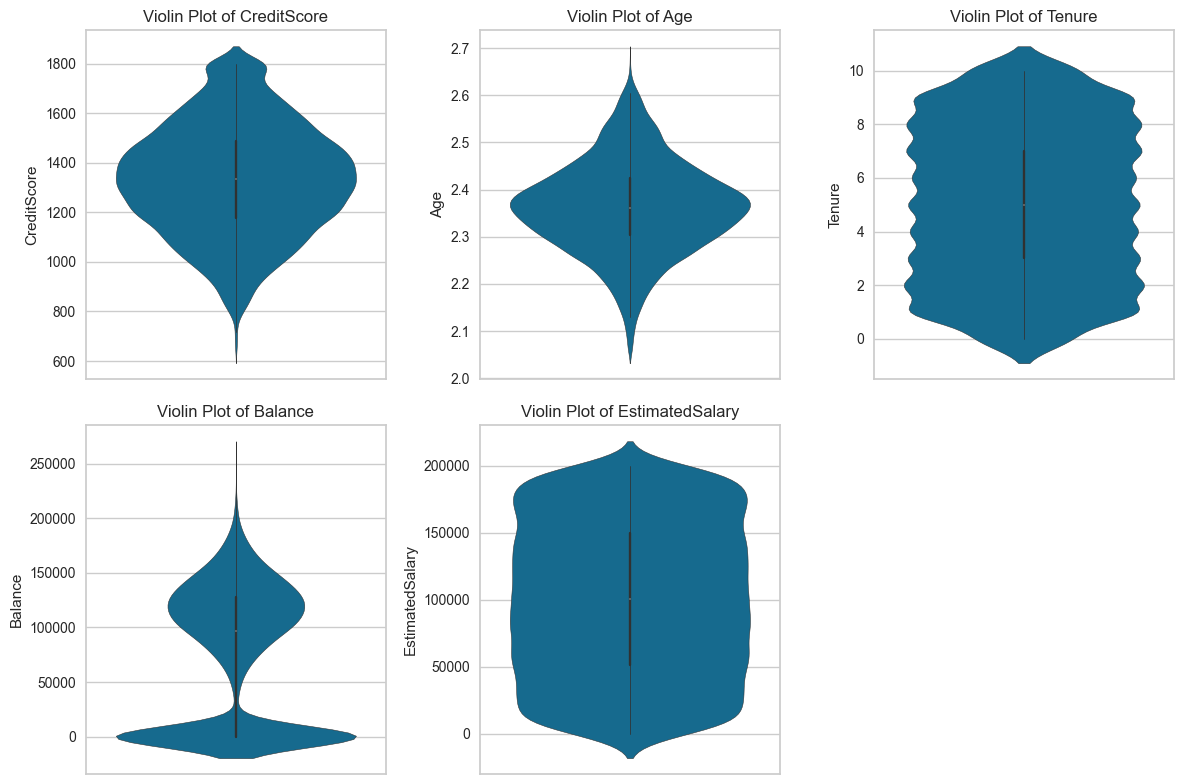

In [87]:
import seaborn as sns

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Create a violin plot for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=data, y=column)
    plt.title(f"Violin Plot of {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

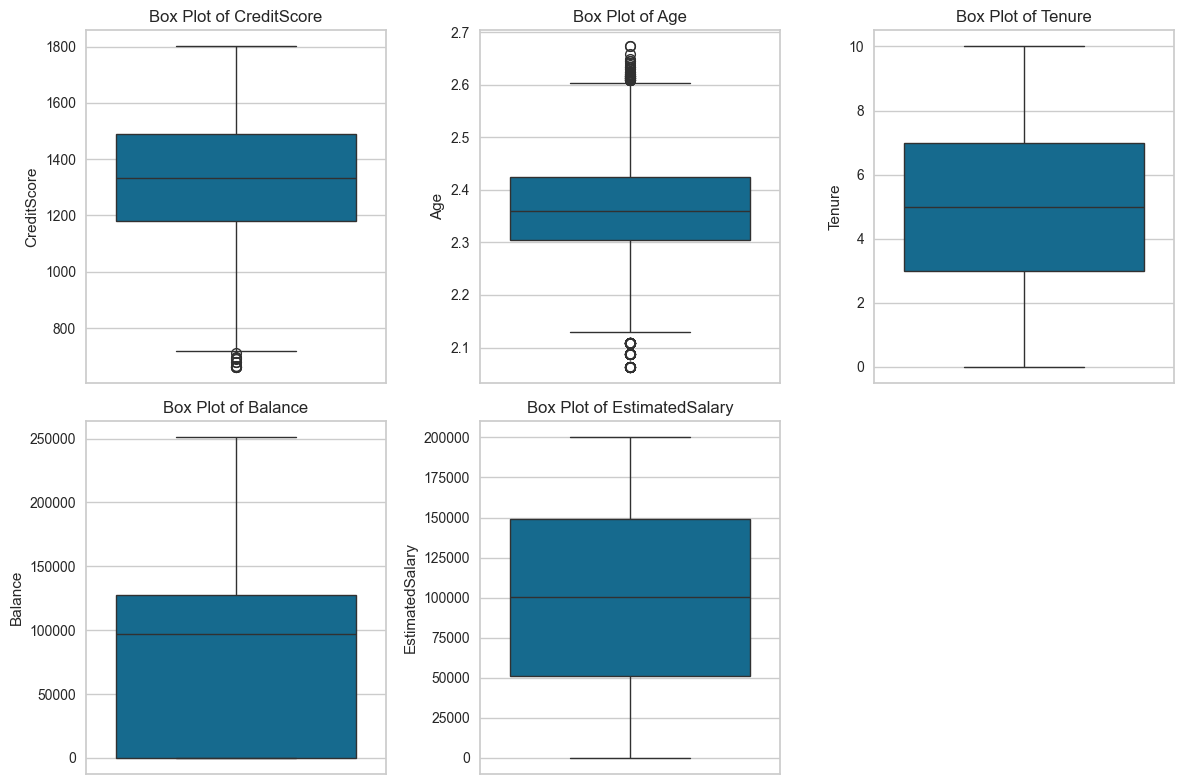

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Create a box plot for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=column)
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [89]:
def remove_outliers_iqr(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    num_rows_before = data.shape[0]
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    num_rows_after = data.shape[0]
    num_rows_removed = num_rows_before - num_rows_after
    print(f"Number of rows removed in '{column}': {num_rows_removed}")
    return data

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for column in numerical_columns:
    data = remove_outliers_iqr(data, column)

Number of rows removed in 'CreditScore': 12
Number of rows removed in 'Age': 143
Number of rows removed in 'Tenure': 0
Number of rows removed in 'Balance': 0
Number of rows removed in 'EstimatedSalary': 0


In [90]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1258.915086,0,0,2.407725,2,0.00,1,1,1,101348.88,1
1,1233.705954,2,0,2.398777,1,83807.86,1,0,1,112542.58,0
2,993.940871,0,0,2.407725,8,159660.80,3,1,0,113931.57,1
3,1443.941075,0,0,2.380050,1,0.00,2,0,0,93826.63,0
4,1800.489366,2,0,2.416415,2,125510.82,1,1,1,79084.10,0


<Axes: title={'center': 'Pearson Correlation of Features'}>

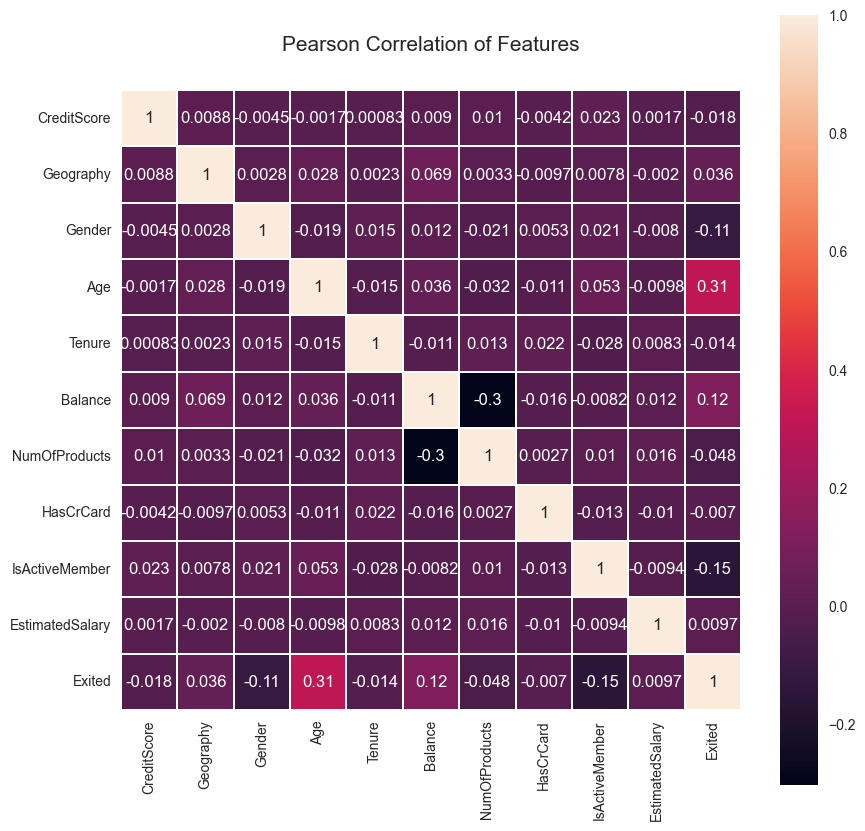

In [91]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, linecolor='white', annot=True)

In [92]:
features = list(data.columns[:10])
print("features:", features, sep="\n")

features:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [93]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

y = data["Exited"]
X = data[features]

selector = SelectKBest(chi2, k=8)
selector.fit(X, y)

X_new = selector.transform(X)
print(data.columns[selector.get_support(indices=True)].tolist())
final_features = data.columns[selector.get_support(indices=True)].tolist()

['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']


In [94]:
selector = SelectKBest(f_classif, k=8)
selector.fit(X, y)

X_new = selector.transform(X)
#print(data.columns[selector.get_support(indices=True)].tolist())
final_features = data.columns[selector.get_support(indices=True)].tolist()
final_feature = final_features.remove("Balance")
print(final_features)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'IsActiveMember']


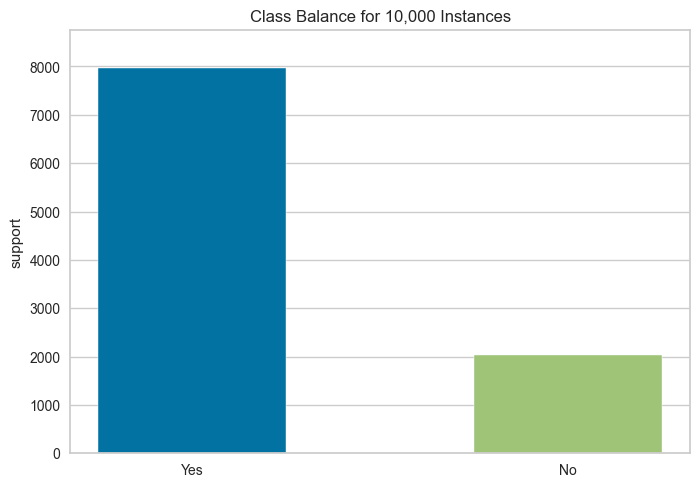

<Axes: title={'center': 'Class Balance for 10,000 Instances'}, ylabel='support'>

In [95]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=["Yes", "No"])

visualizer.fit(df["Exited"])
visualizer.show()

In [96]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({1: 7826, 0: 7826})


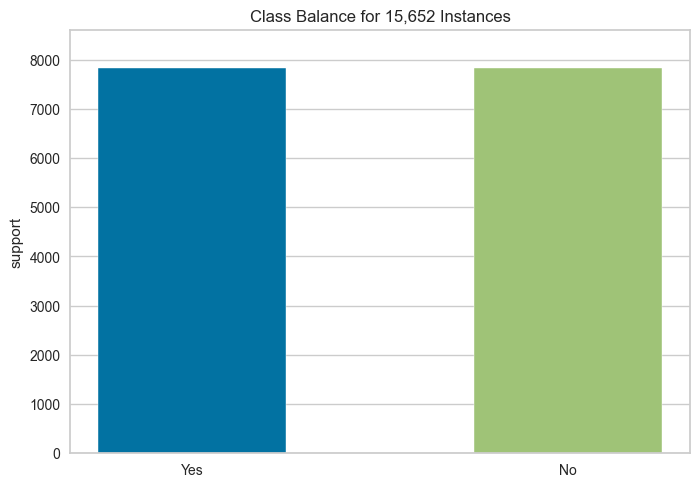

<Axes: title={'center': 'Class Balance for 15,652 Instances'}, ylabel='support'>

In [97]:
visualizer = ClassBalance(labels=["Yes", "No"])
visualizer.fit(y)
visualizer.show()

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler0=StandardScaler()
scaler0.fit(X_train,y_train)

X_train = pd.DataFrame(
    scaler0.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler0.transform(X_test),
    columns=X_train.columns
)
clf = LogisticRegression().fit(X_train, y_train)
pred = clf.predict(X_test)

In [101]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(f1_score(y_test, pred))
print(roc_auc_score(y_test, pred))

0.7821782178217822
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1554
           1       0.78      0.79      0.78      1577

    accuracy                           0.78      3131
   macro avg       0.78      0.78      0.78      3131
weighted avg       0.78      0.78      0.78      3131

0.784586228679722
0.7821383073443948


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter = 10000)


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 1, 10],
    'solver': ['liblinear', 'saga']
}


grid_search = GridSearchCV(logreg, param_grid, scoring='accuracy', cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(best_params)
logreg_best = LogisticRegression(**best_params)
logreg_best.fit(X_train, y_train)
y_pred = logreg_best.predict(X_test)

print(classification_report(y_test, y_pred))

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1554
           1       0.78      0.79      0.78      1577

    accuracy                           0.78      3131
   macro avg       0.78      0.78      0.78      3131
weighted avg       0.78      0.78      0.78      3131



In [103]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.7821782178217822
0.784586228679722
0.7821383073443948


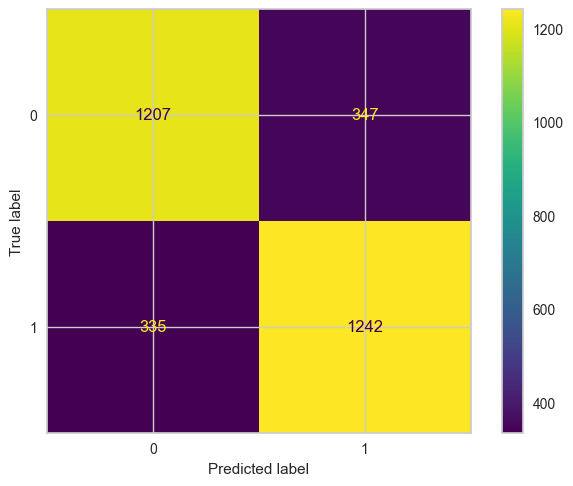

In [104]:
cm = confusion_matrix(y_test, y_pred, labels=logreg_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logreg_best.classes_)
disp.plot()

plt.show()

In [105]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint

In [106]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
     {'model__n_estimators': [50, 100, 200],
      'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
     {'model__n_estimators': [50, 100, 200],
      'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
     {'model__C': [0.1, 1, 10],
      'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
     {'model__C': [0.1, 1, 10],
      'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
     {'model__n_neighbors': [3, 5, 7],
      'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
     {'model__max_depth': [None, 10, 20],
      'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
     {'model__n_estimators': [50, 100, 200],
      'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
     {'model__n_estimators': [50, 100, 200],
      'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2), "%")

Model: Random Forest
Test Accuracy: 0.86 %

Model: Gradient Boosting
Test Accuracy: 0.884 %

Model: Support Vector Machine
Test Accuracy: 0.824 %



C:\Users\kshit\OneDrive\Desktop\Datalore\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kshit\OneDrive\Desktop\Datalore\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kshit\OneDrive\Desktop\Datalore\venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kshit\OneDrive\Desktop\Datalore\venv\Lib\

Model: Logistic Regression
Test Accuracy: 0.779 %

Model: K-Nearest Neighbors
Test Accuracy: 0.814 %

Model: Decision Tree
Test Accuracy: 0.813 %

Model: Ada Boost
Test Accuracy: 0.836 %

Model: XG Boost
Test Accuracy: 0.873 %

Model: Naive Bayes
Test Accuracy: 0.791 %

Best Model:
Test Accuracy: 0.8837432130309805
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.5,
                                            random_state=42))]) with accuracy 0.88 %


In [107]:
df = pd.read_csv("Churn_Modelling.csv")

In [108]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [127]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
